In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
iris=pd.read_csv('iris.csv')

In [6]:
iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris['class'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: class, dtype: int64

In [9]:
iris.groupby('class').mean()

,sepal length,sepal width,petal length,petal width
class,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [10]:
pd.pivot_table(iris, index=['class'], values=['sepal length', 'sepal width'], aggfunc=[np.mean, np.median])

mean                   median            
                sepal length sepal width sepal length sepal width
class                                                            
Iris-setosa            5.006       3.418          5.0         3.4
Iris-versicolor        5.936       2.770          5.9         2.8
Iris-virginica         6.588       2.974          6.5         3.0

In [11]:
# there is no scope of making a cross tab

# Univariate Analysis

In [54]:
# Countplot
# Bar Plot
# Boxplot
# Distplot
# Lineplot

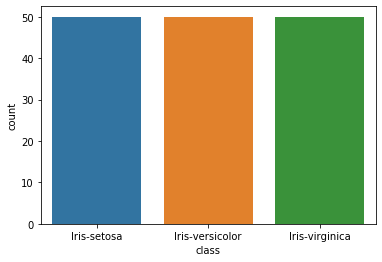

In [13]:
sns.countplot(data=iris, x='class')

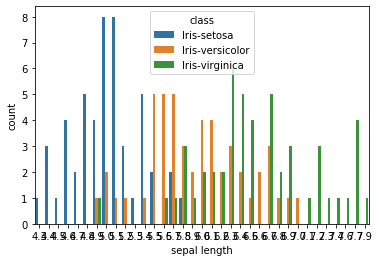

In [17]:
sns.countplot(data=iris, x='sepal length', hue='class')

we can only pass one variable in Countplot and it will count the various classes present in that variable 

If there are 2 categorical variables, we can input one as x and other as hue

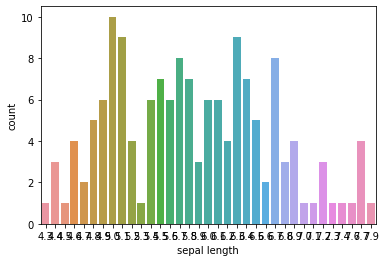

In [18]:
sns.countplot(data=iris, x='sepal length')

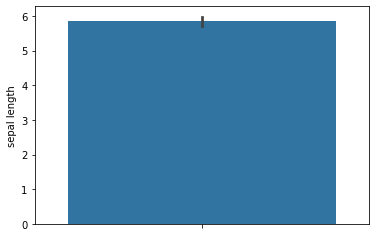

In [22]:
sns.barplot(data=iris, x='sepal length', hue='class', orient='v')

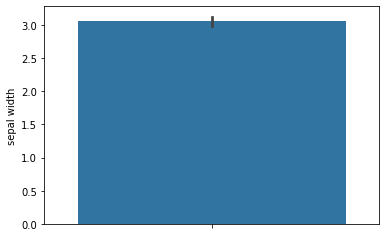

In [23]:
sns.barplot(data=iris, x='sepal width', hue='class', orient='v')

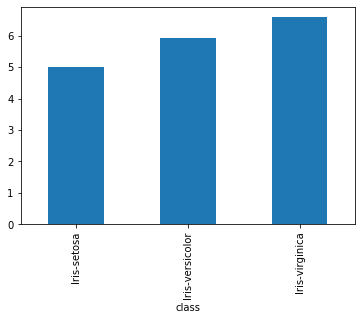

In [33]:
iris.groupby('class').mean()['sepal length'].plot.bar()

use groupby function to see the characteristics of a continuos variable class-wise

It basically is a hue in bar graph

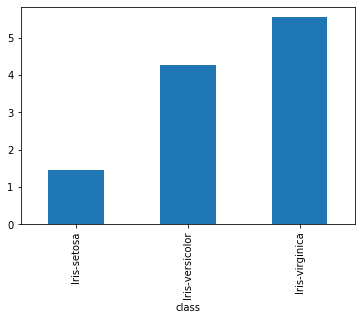

In [34]:
iris.groupby('class').mean()['petal length'].plot.bar()

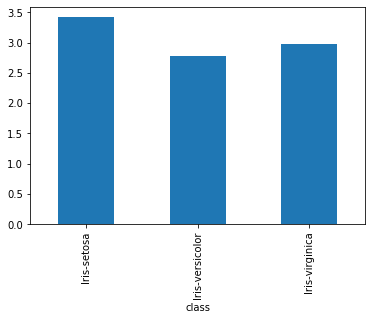

In [35]:
iris.groupby('class').mean()['sepal width'].plot.bar()

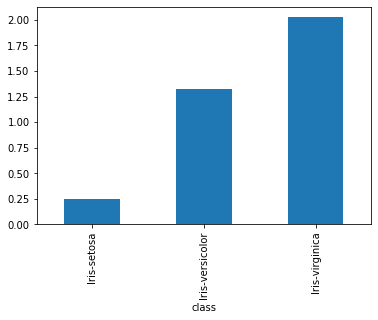

In [36]:
iris.groupby('class').mean()['petal width'].plot.bar()

<BarContainer object of 150 artists>

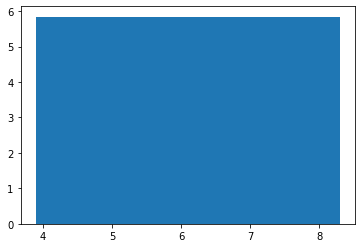

In [26]:
plt.bar(x=iris['sepal length'], height=np.mean(iris['sepal length']))

There is no option available for hue in the plt

In [37]:
# box plot

sepal length       AxesSubplot(0.125,0.536818;0.352273x0.343182)
sepal width     AxesSubplot(0.547727,0.536818;0.352273x0.343182)
petal length          AxesSubplot(0.125,0.125;0.352273x0.343182)
petal width        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

<Figure size 1440x1440 with 0 Axes>

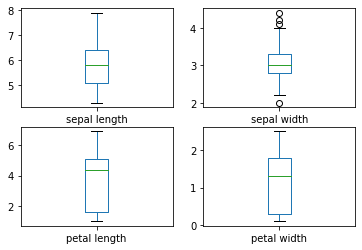

In [39]:
plt.figure(figsize=(20,20))
iris.plot(kind='box', subplots=True, layout=(2,2))

In [40]:
# Distplot

In [42]:
col=iris.columns.values
col

array(['sepal length', 'sepal width', 'petal length', 'petal width',
       'class'], dtype=object)

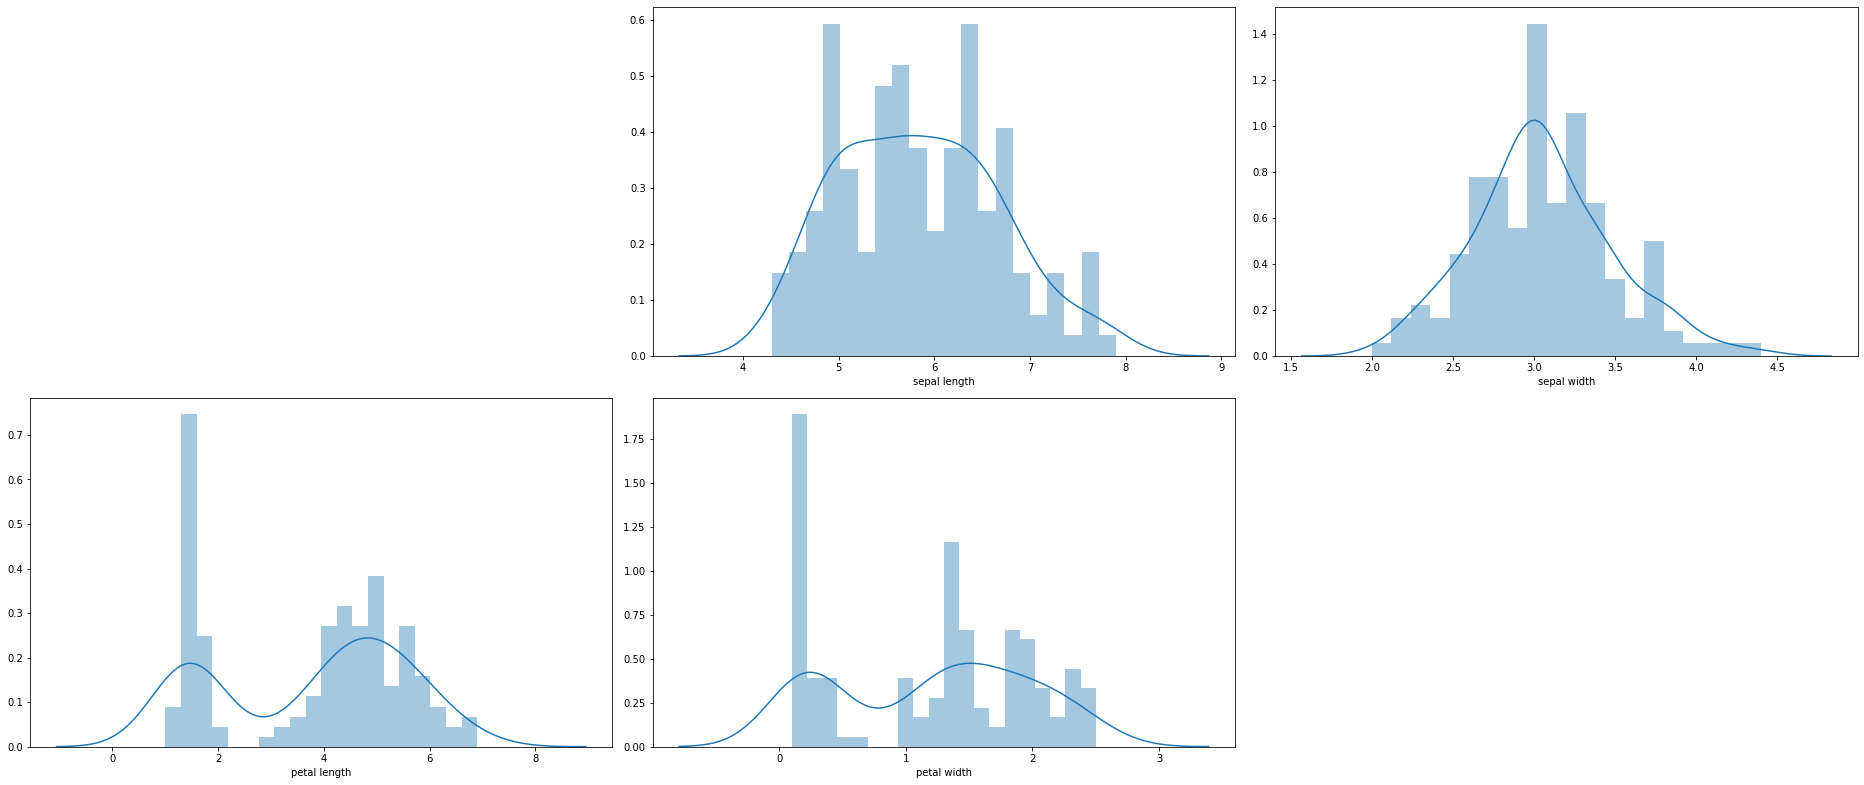

In [73]:
plt.figure(figsize=(26,16))
for i in range(len(col)-1):
    plt.subplot(3,3,i+2)
    sns.distplot(iris[col[i]], bins=20)
    plt.tight_layout()

decrease the values inside plt.subplot() to make the graphs bigger

In [49]:
# Line Plot

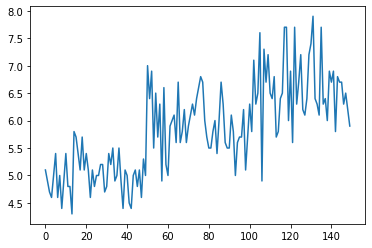

In [52]:
plt.plot(iris['sepal length'])

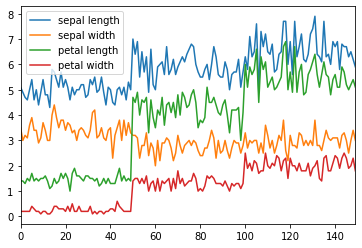

In [53]:
iris.drop(['class'], axis=1).plot.line()

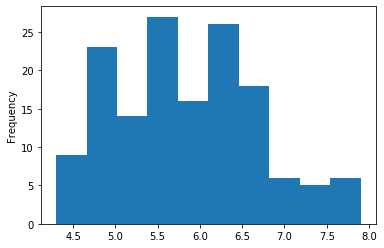

In [75]:
iris['sepal length'].plot.hist()

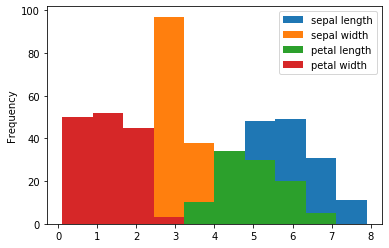

In [78]:
iris.plot.hist(by='class')
# meaningless?

# Bivariate Analysis

In [67]:
# continuous-continuous:--
# Scatter plots
# categorical plots
# swarm plots/strip plots

# continuous-categorical (like sex and age):--
# bar graph
# ex.-- diff between mean age of male and female

# categorical-categorical (like sex and survived):--
# two way tables
# graph from 2 way tables

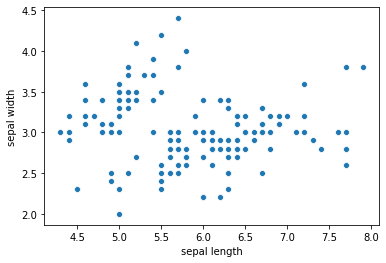

In [56]:
sns.scatterplot(data=iris, x='sepal length', y='sepal width')

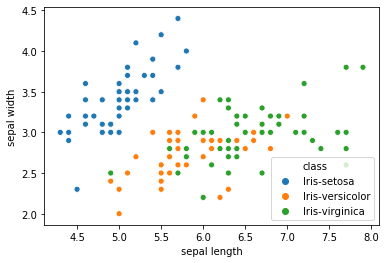

In [57]:
sns.scatterplot(data=iris, x='sepal length', y='sepal width', hue='class')

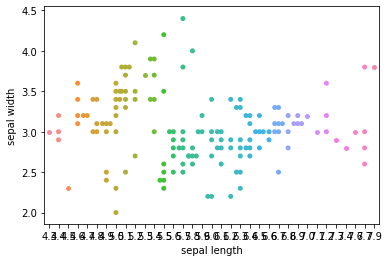

In [58]:
sns.swarmplot(data=iris, x='sepal length', y='sepal width')

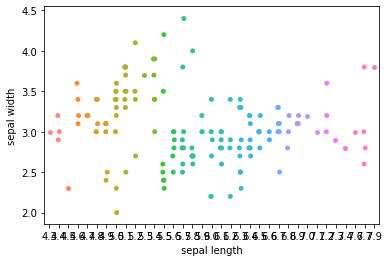

In [59]:
sns.stripplot(data=iris, x='sepal length', y='sepal width')

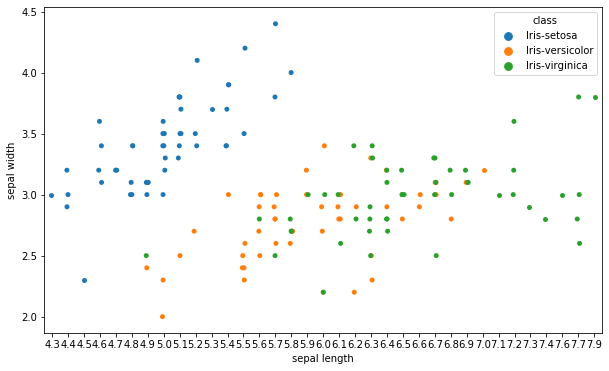

In [65]:
plt.figure(figsize=(10,6))
sns.stripplot(data=iris, x='sepal length', y='sepal width', hue='class')

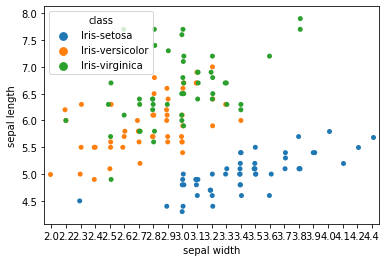

In [61]:
sns.stripplot(data=iris, y='sepal length', x='sepal width', hue='class')

In [68]:
# bar graph
# means of different continuous variables vs the categories
# like mean of sepal length in setosa vs virginica

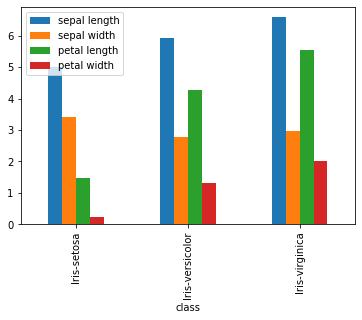

In [69]:
iris.groupby('class').mean().plot.bar()

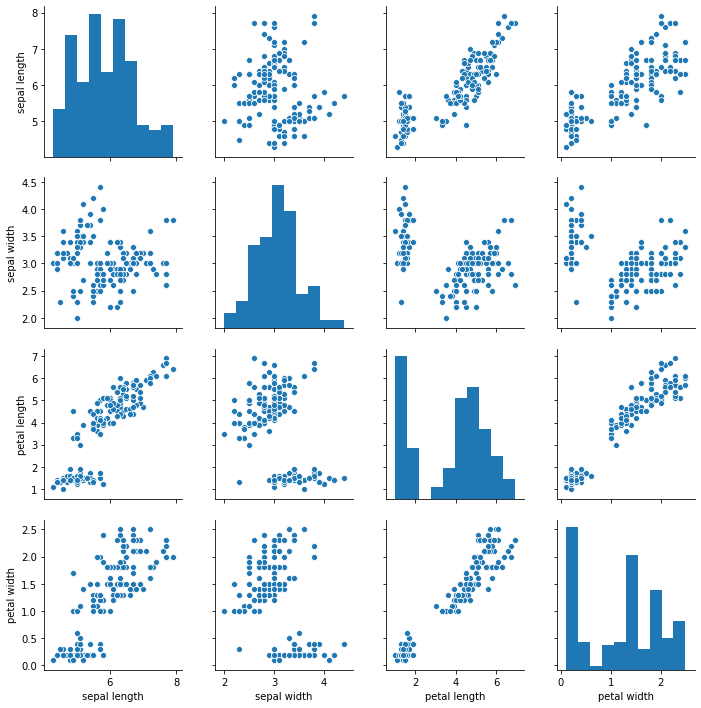

In [70]:
sns.pairplot(iris)

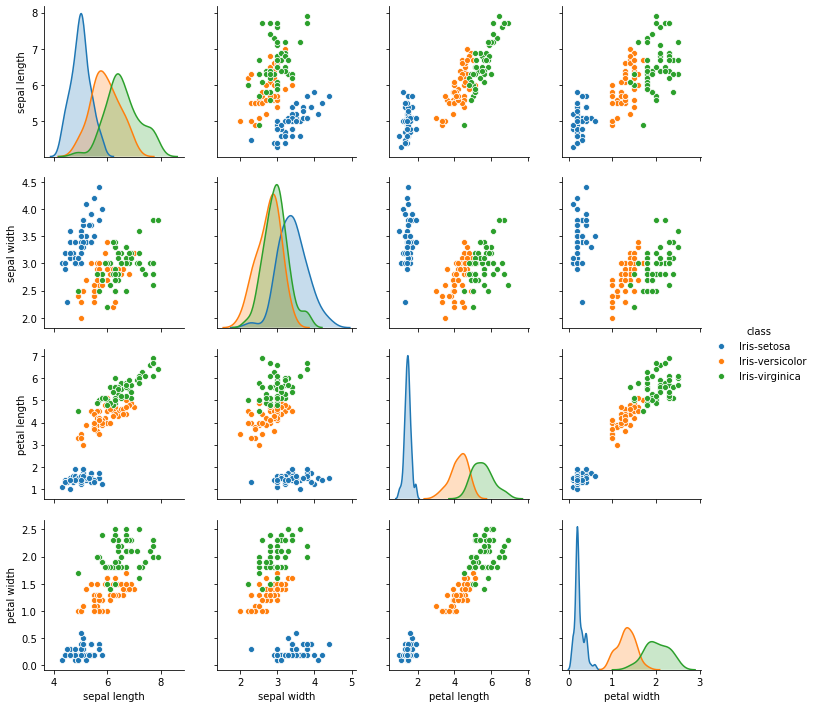

In [71]:
sns.pairplot(iris, hue='class')

In [79]:
iris.corr()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


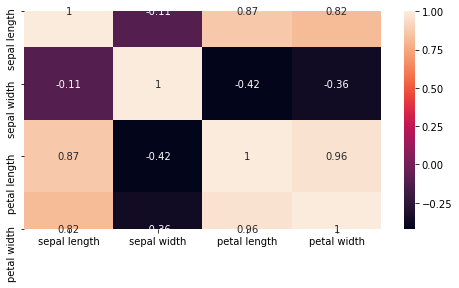

In [81]:
plt.figure(figsize=(8,4))
sns.heatmap(iris.corr(), annot=True)

In [82]:
iris.skew()

sepal length    0.314911
sepal width     0.334053
petal length   -0.274464
petal width    -0.104997
dtype: float64

In [83]:
# in order to check the correlation with the target, we need to transform the target first

# Variable Transformation

In [85]:
from sklearn.preprocessing import LabelEncoder

In [86]:
le=LabelEncoder()

In [87]:
iris['class']=le.fit_transform(iris['class'])
iris['class'].head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int32

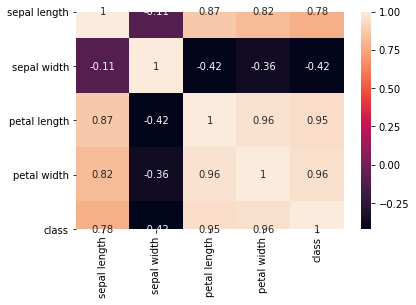

In [88]:
sns.heatmap(iris.corr(), annot=True)

In [89]:
# sepal width is negatively correlated with the class